In [112]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ms = pd.read_csv("D:\downloads\microsoft.csv")

fb = pd.read_csv(r"D:\downloads\facebook.csv")

print(fb.shape)
print(ms.shape)

print(fb.head)
print(ms.head)

(780, 7)
(780, 7)
<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2014-12-31   20.400000   20.510000   19.990000   20.049999   19.459270   
1    2015-01-02   20.129999   20.280001   19.809999   20.129999   19.536913   
2    2015-01-05   20.129999   20.190001   19.700001   19.790001   19.206934   
3    2015-01-06   19.820000   19.840000   19.170000   19.190001   18.624611   
4    2015-01-07   19.330000   19.500000   19.080000   19.139999   18.576082   
..          ...         ...         ...         ...         ...         ...   
775  2018-01-30  241.110001  246.419998  238.410004  242.720001  242.720001   
776  2018-01-31  245.770004  249.270004  244.449997  245.800003  245.800003   
777  2018-02-01  238.520004  246.899994  238.059998  240.500000  240.500000   
778  2018-02-02  237.000000  237.970001  231.169998  233.520004  233.520004   
779  2018-02-05  227.000000  233.229996  205.000000  213.699997  213.699997   

   

In [113]:
print(fb.describe())
print(ms.describe())

print(fb.info)
print(ms.info)

print(fb.dtypes)
print(ms.dtypes)

             Open        High         Low       Close   Adj Close  \
count  780.000000  780.000000  780.000000  780.000000  780.000000   
mean    80.212705   81.285654   79.022397   80.264897   79.914215   
std     64.226121   65.048907   63.190963   64.198375   64.327846   
min     19.250000   19.500000   18.940001   19.139999   18.576082   
25%     25.525000   26.085000   24.845000   25.475000   25.134512   
50%     53.379999   54.034999   52.930000   53.420000   53.035403   
75%    113.322502  115.779999  110.297499  113.702501  113.261238   
max    245.770004  249.270004  244.449997  246.850006  246.850006   

             Volume  
count  7.800000e+02  
mean   1.204453e+07  
std    8.221848e+06  
min    1.311200e+06  
25%    7.215200e+06  
50%    9.728700e+06  
75%    1.408885e+07  
max    9.232320e+07  
             Open        High         Low       Close   Adj Close  \
count  780.000000  780.000000  780.000000  780.000000  780.000000   
mean    58.912308   59.372308   58.465000 

In [114]:
# Assuming 'Date' column is not the index
fb['Date'] = pd.to_datetime(fb['Date'])  # Convert 'Date' column to datetime
fb.set_index('Date', inplace=True)  # Set 'Date' column as index

# Selecting rows from 2015-01-01 to 2015-12-31
fb_2015 = fb.loc['2015-01-01':'2015-12-31']

# Now, you can use .loc to access rows by date
print(fb_2015.loc['2015-03-16'])


Open         2.288000e+01
High         2.311000e+01
Low          2.273000e+01
Close        2.297000e+01
Adj Close    2.237908e+01
Volume       5.923900e+06
Name: 2015-03-16 00:00:00, dtype: float64


In [115]:
ms['Date'] = pd.to_datetime(ms['Date'])  # Convert 'Date' column to datetime
ms.set_index('Date', inplace=True)  # Set 'Date' column as index

# Selecting rows from 2015-01-01 to 2015-12-31
ms_2015 = ms.loc['2015-01-01':'2015-12-31']

# Now, you can use .loc to access rows by date
print(ms_2015.loc['2015-03-16'])


Open         4.147000e+01
High         4.164000e+01
Low          4.128000e+01
Close        4.156000e+01
Adj Close    3.861071e+01
Volume       3.527350e+07
Name: 2015-03-16 00:00:00, dtype: float64


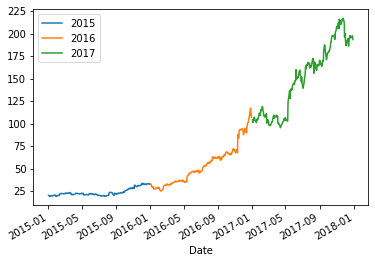

In [116]:
fb.loc['2015-01-01':'2015-12-31', 'Close'].plot(label='2015') #2015
fb.loc['2016-01-01':'2016-12-31', 'Close'].plot(label='2016') #2016
fb.loc['2017-01-01':'2017-12-31', 'Close'].plot(label='2017') #2017
plt.legend()

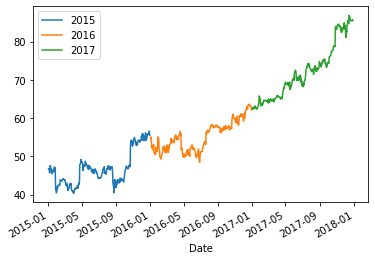

In [120]:
ms.loc['2015-01-01':'2015-12-31', 'Close'].plot(label='2015') #2015
ms.loc['2016-01-01':'2016-12-31', 'Close'].plot(label='2016') #2016
ms.loc['2017-01-01':'2017-12-31', 'Close'].plot(label='2017') #2017
plt.legend()

In [121]:
#Shifting collomn one row upwards to do
#To compare the price difference between 
fb['Price1'] = fb['Close'].shift(-1)

#Price diff = Future Close Price - Present Close Price
fb['PriceDiff'] = fb['Price1'] - fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618


In [122]:
#Daily return = Price Difference/Present Close Price 
fb['DailyReturn'] = fb['PriceDiff']/fb['Close']
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618


In [123]:
#Creating a Direction column must have the following rules:
#PriceDiff > 0  -> Up 1
#PriceDiff <= 0 -> Down -1
fb['Direction'] = [1 if fb.loc[ei, 'PriceDiff'] > 0 else -1
                   for ei in fb.index]

In [124]:
#Calculating moving average over the 3 days
#Due to random fluctuations taking an average price in a period can smooth out noise
fb['MovingAverage'] = (fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2))/3

In [125]:
fb.head()


,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,MovingAverage
Date,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1,NaN
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1,NaN
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1,19.990000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1,19.703334
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1,19.373334


In [126]:
#I want to get the MA for 10,50,and 200 days
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb['MA200'] = fb['Close'].rolling(200).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,MovingAverage,MA10,MA50,MA200
Date,,,,,,,,,,,,,,
2015-10-15,27.410000,27.990000,27.129999,27.430000,26.961004,13151200,27.860001,0.430001,0.015676,1,27.063334,26.177,23.4542,21.77235
2015-10-16,27.520000,28.120001,27.450001,27.860001,27.383654,11209900,27.809999,-0.050002,-0.001795,-1,27.550001,26.483,23.6024,21.81140
2015-10-19,27.950001,28.080000,27.490000,27.809999,27.334509,7367800,27.770000,-0.039999,-0.001438,-1,27.700000,26.722,23.6990,21.84980
2015-10-20,27.690001,27.900000,27.480000,27.770000,27.295193,6610700,27.410000,-0.360000,-0.012964,-1,27.813333,26.924,23.7788,21.88970
2015-10-21,27.940001,28.110001,27.360001,27.410000,26.941347,9657000,28.400000,0.990000,0.036118,1,27.663333,27.063,23.8538,21.93080


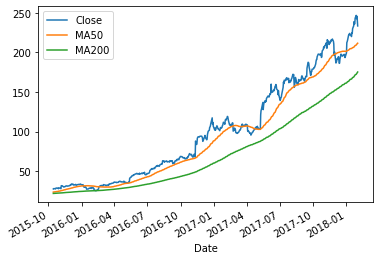

In [127]:
#with what I have calculated I want to plot the MA
fb['Close'].plot(label='Close')
fb['MA50'].plot(label='MA50') #fast signal
fb['MA200'].plot(label='MA200') #slow signal
plt.legend()

#the MA50 > MA20 stock can be speculated the stock would have gone up for a limited time after 2018-1

In [128]:
fb['Shares'] = [ 1 if fb.loc[ei,'MA50']>fb.loc[ei,'MA10'] else 0
                for ei in fb.index]

In [129]:
fb.head()
fb.tail()
fb.describe()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,MovingAverage,MA10,MA50,MA200,Shares
count,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,100.033552,101.368362,98.557776,100.113586,99.814053,1.349964e+07,100.434741,0.321155,0.003901,0.127586,99.753575,98.450896,91.832161,70.666103,0.155172
std,62.784255,63.559644,61.828975,62.783555,62.895782,8.763371e+06,62.887441,2.980123,0.027310,0.992684,62.573165,61.754086,58.500073,45.679083,0.362381
min,24.780001,25.559999,24.750000,25.219999,24.882921,1.311200e+06,25.219999,-19.820007,-0.092723,-1.000000,25.380000,26.177000,23.454200,21.772350,0.000000
25%,38.670000,40.115000,38.427500,40.062500,39.671048,8.179950e+06,41.887499,-0.562498,-0.007657,-1.000000,37.397500,36.647751,35.090350,29.470187,0.000000
50%,93.935001,94.944999,92.465001,93.810001,93.376209,1.104720e+07,94.040001,0.175003,0.002546,1.000000,93.495002,92.370000,76.935000,54.549025,0.000000
75%,158.395001,160.084999,153.869996,157.582504,157.334580,1.552100e+07,158.564995,1.175002,0.015033,1.000000,157.258333,153.587749,137.533299,104.961750,0.000000
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07,246.850006,20.200004,0.298067,1.000000,245.123337,239.747003,211.685401,175.261050,1.000000


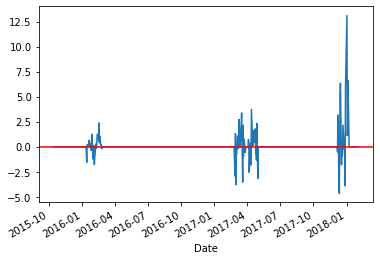

In [130]:
#Daily Profit for Facebook
fb['Close1'] = fb['Close'].shift(-1)
fb.iloc[500:505,:]
fb['Profit'] = [fb.loc[ei,'Close1']-fb.loc[ei,'Close']
                if fb.loc[ei,'Shares']==1
                else 0 for ei in fb.index]
#graphing the profit showing when we lose and earn
fb['Profit'].plot()
plt.axhline(y=0, color='red')

plt.show()

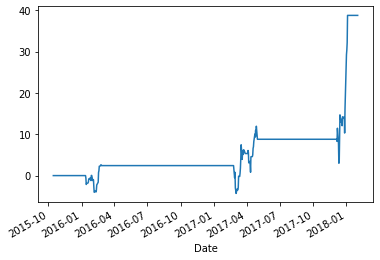

In [131]:
#I want to calculate if this strat is able to generate profit
fb['Cummulative'] = fb['Profit'].cumsum()
fb.tail()
fb['Cummulative'].plot()
plt.show()
#ms.index(-1)
#this strat is profitable but this 

In [132]:
ms['Price1'] = ms['Close'].shift(-1)
ms['PriceDiff'] = ms['Price1'] - ms['Close']
ms['DailyReturn'] = ms['PriceDiff']/ms['Close']
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn
Date,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997,0.006674
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996,-0.009196
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000,-0.014677
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998,0.012705
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000,0.029418


In [133]:
ms['Direction'] = [1 if ms.loc[ei, 'PriceDiff'] > 0 else -1
                   for ei in ms.index]
ms['MovingAverage'] = (ms['Close'] + ms['Close'].shift(1) + ms['Close'].shift(2))/3
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,MovingAverage
Date,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997,0.006674,1,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996,-0.009196,-1,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000,-0.014677,-1,46.513334
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998,0.012705,1,46.246667
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000,0.029418,1,46.070001


In [134]:
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms['MA200'] = ms['Close'].rolling(200).mean()
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,MovingAverage,MA10,MA50,MA200
Date,,,,,,,,,,,,,,
2015-10-15,47.009998,47.029999,46.529999,47.009998,44.247669,27189400,47.509998,0.500000,0.010636,1,46.859999,46.789,44.8200,44.81560
2015-10-16,47.020000,47.540001,46.900002,47.509998,44.718285,26450300,47.619999,0.110001,0.002315,1,47.066665,46.983,44.8378,44.82090
2015-10-19,47.419998,47.880001,47.020000,47.619999,44.821823,29387600,47.770000,0.150001,0.003150,1,47.379998,47.082,44.8554,44.82520
2015-10-20,47.439999,47.810001,47.020000,47.770000,44.963005,30574000,47.200001,-0.569999,-0.011932,-1,47.633332,47.184,44.8642,44.83240
2015-10-21,47.919998,47.990002,47.110001,47.200001,44.426506,25144300,48.029999,0.829998,0.017585,1,47.530000,47.224,44.8800,44.84015


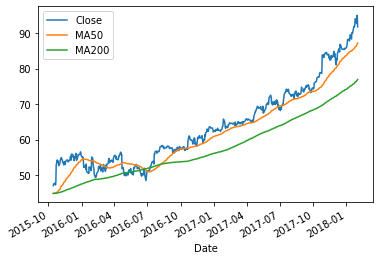

In [135]:
ms['Close'].plot(label='Close')
ms['MA50'].plot(label='MA50') #fast signal
ms['MA200'].plot(label='MA200') #slow signal
plt.legend()

In [136]:
ms['Shares'] = [ 1 if ms.loc[ei,'MA50']>ms.loc[ei,'MA10'] else 0
                for ei in ms.index]
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,MovingAverage,MA10,MA50,MA200,Shares
Date,,,,,,,,,,,,,,,
2018-01-29,95.139999,95.449997,93.720001,93.919998,93.480873,31569900,92.739998,-1.180000,-0.012564,-1,93.436666,91.423,86.3292,76.36990,0
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,95.010002,2.270004,0.024477,1,93.573331,91.862,86.5244,76.50885,0
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,94.260002,-0.750000,-0.007894,-1,93.889999,92.349,86.7606,76.65650,0
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,91.779999,-2.480003,-0.026310,-1,94.003334,92.765,86.9978,76.80085,0
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,88.000000,-3.779999,-0.041185,-1,93.683334,92.943,87.1828,76.93455,0


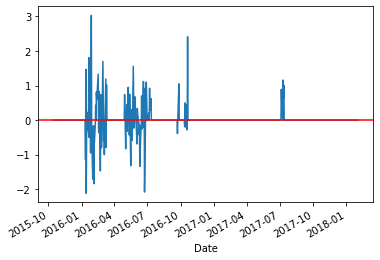

In [137]:
ms['Close1'] = ms['Close'].shift(-1)
ms.iloc[500:505,:]
ms['Profit'] = [ms.loc[ei,'Close1']-ms.loc[ei,'Close']
                if ms.loc[ei,'Shares']==1
                else 0 for ei in ms.index]
#graphing the profit showing when we lose and earn
ms['Profit'].plot()
plt.axhline(y=0, color='red')

plt.show()

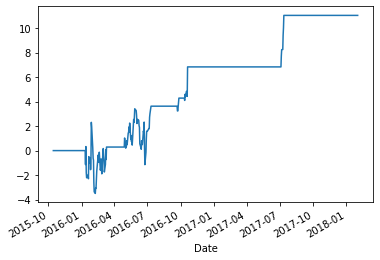

In [138]:
ms['Cummulative'] = ms['Profit'].cumsum()
ms.tail()
ms['Cummulative'].plot()
plt.show()